## Lecture-03 Gradient Descent and Dymanic Programming

In this week, we need complete following tasks:
+ Re-review the course online programming; 
+ Choose 1 - 2 books which you interested and keep reading; 
+ Answer the review questions
+ Prepare the basic requirement of our 1st project. 

### Part I Review the online programming. 

### Part 2: change loss function from $loss = \frac{1}{n}\sum{(y_i - \hat(y_i))^2}$ to $loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|}$, and using your mathmatical knowledge to get the right partial formual. Implemen the gradient descent code.

In [3]:
#重新计算损失函数与倒数
def loss2(y, y_hat): # to evaluate the performance 
    return sum(np.abs([(y_i - y_hat_i) for y_i, y_hat_i in zip(list(y), list(y_hat))]))/ len(list(y))
def partial_k(x, y, y_hat):
    n = len(y)

    gradient = 0
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        # 两种情况
        if( y_i-y_hat_i)>=0:
            gradient += (-1) * x_i
        else:
            gradient=+x_i

    
    return 1 / n * gradient


def partial_b(x, y, y_hat):
    n = len(y)

    gradient = 0
    
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        if y_i-y_hat_i>=0:
            gradient += (-1) 
        else:
            gradient=+1

    
    return 1 / n * gradient
def price(rm, k, b):
    """f(x) = k * x + b"""
    return k * rm + b 

In [9]:
from sklearn.datasets import load_boston
import random
import numpy as np
data = load_boston()
X, y = data['data'], data['target']
X_rm = X[:, 5]


#.3. Gradient Descent to get optimal k* and *b

trying_times = 100000

X, y = data['data'], data['target']

min_loss = float('inf') 

current_k = random.random() * 200 - 100
current_b = random.random() * 200 - 100

learning_rate = 1e-03


update_time = 0

for i in range(trying_times):
    
    price_by_k_and_b = [price(r, current_k, current_b) for r in X_rm]
    
    current_loss = loss2(y, price_by_k_and_b)
    

    if current_loss < min_loss: # performance became better
        min_loss = current_loss
        
        if i % 500 == 0: 
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i,current_k, current_b, min_loss))

    k_gradient = partial_k(X_rm, y, price_by_k_and_b)
    
    b_gradient = partial_b(X_rm, y, price_by_k_and_b)
    
    current_k = current_k + (-1 * k_gradient) * learning_rate

    current_b = current_b + (-1 * b_gradient) * learning_rate

When time is : 0, get best_k: 84.59558907812672 best_b: -25.53313025707334, and the loss is: 483.586411557492
When time is : 500, get best_k: 84.58963058010463 best_b: -25.534118399366662, and the loss is: 483.54797643363156
When time is : 1000, get best_k: 84.58367208208253 best_b: -25.535106541659985, and the loss is: 483.509541309772
When time is : 1500, get best_k: 84.57771358406043 best_b: -25.53609468395331, and the loss is: 483.4711061859118
When time is : 2000, get best_k: 84.57175508603834 best_b: -25.537082826246632, and the loss is: 483.4326710620516
When time is : 2500, get best_k: 84.56579658801624 best_b: -25.538070968539955, and the loss is: 483.39423593819174
When time is : 3000, get best_k: 84.55983808999414 best_b: -25.53905911083328, and the loss is: 483.3558008143318
When time is : 3500, get best_k: 84.55387959197205 best_b: -25.540047253126602, and the loss is: 483.31736569047223
When time is : 4000, get best_k: 84.54792109394995 best_b: -25.541035395419925, and th

When time is : 52500, get best_k: 83.96994678580663 best_b: -25.63688519787229, and the loss is: 479.5507235521958
When time is : 53000, get best_k: 83.96398828778453 best_b: -25.637873340165612, and the loss is: 479.5122884283365
When time is : 53500, get best_k: 83.95802978976243 best_b: -25.638861482458935, and the loss is: 479.473853304477
When time is : 54000, get best_k: 83.95207129174034 best_b: -25.63984962475226, and the loss is: 479.43541818061647
When time is : 54500, get best_k: 83.94611279371824 best_b: -25.640837767045582, and the loss is: 479.3969830567567
When time is : 55000, get best_k: 83.94015429569615 best_b: -25.641825909338905, and the loss is: 479.3585479328968
When time is : 55500, get best_k: 83.93419579767405 best_b: -25.64281405163223, and the loss is: 479.32011280903663
When time is : 56000, get best_k: 83.92823729965195 best_b: -25.643802193925552, and the loss is: 479.2816776851772
When time is : 56500, get best_k: 83.92227880162986 best_b: -25.6447903362

### Part 3: Finish the Solution Parse Part of Edit-Distance

In [11]:
#思考中
#@lru_cache(maxsize=2**10)
def edit_distance(string1, string2):
    
    if len(string1) == 0: return len(string2)
    if len(string2) == 0: return len(string1)
    
    tail_s1 = string1[-1]
    tail_s2 = string2[-1]
    
    candidates = [
        (edit_distance(string1[:-1], string2) + 1, 'DEL {}'.format(tail_s1)),  # string 1 delete tail
        (edit_distance(string1, string2[:-1]) + 1, 'ADD {}'.format(tail_s2)),  # string 1 add tail of string2
    ]
    
    if tail_s1 == tail_s2:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 0, '')
    else:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 1, 'SUB {} => {}'.format(tail_s1, tail_s2))

    candidates.append(both_forward)
    
    min_distance, operation = min(candidates, key=lambda x: x[0])
    
    solution[(string1, string2)] = operation 
    
    return min_distance


In [14]:
solution = {}
edit_distance('jary', 'jerry')

2

In [15]:
solution

{('j', 'j'): '',
 ('j', 'je'): 'ADD e',
 ('j', 'jer'): 'ADD r',
 ('j', 'jerr'): 'ADD r',
 ('j', 'jerry'): 'ADD y',
 ('ja', 'j'): 'DEL a',
 ('ja', 'je'): 'SUB a => e',
 ('ja', 'jer'): 'ADD r',
 ('ja', 'jerr'): 'ADD r',
 ('ja', 'jerry'): 'ADD y',
 ('jar', 'j'): 'DEL r',
 ('jar', 'je'): 'DEL r',
 ('jar', 'jer'): '',
 ('jar', 'jerr'): 'ADD r',
 ('jar', 'jerry'): 'ADD y',
 ('jary', 'j'): 'DEL y',
 ('jary', 'je'): 'DEL y',
 ('jary', 'jer'): 'DEL y',
 ('jary', 'jerr'): 'SUB y => r',
 ('jary', 'jerry'): ''}

In [24]:
def parse_solutions(solutions: dict, string1: str, string2: str) -> str:
    route = []
    def helper(solutions: dict, string1: str, string2: str) -> None:
        if not string1 and not string2: return
        operation = solutions[(string1, string2)]
        route.append('{k}: {v}'.format(k=(string1, string2), v=operation))
        if operation.startswith('SUB') or operation == '':
            helper(solutions, string1[:-1], string2[:-1])
        elif operation.startswith('ADD'):
            helper(solutions, string1, string2[:-1])
        elif operation.startswith('DEL'):
            helper(solutions, string1[:-1], string2)
    helper(solutions, string1, string2)
    route.reverse()
    return '=>'.join(route)  

In [ ]:
def stop(string1,string2):
    return string1==string2
    
def parse(string1,string2,solution):
    parse_solution=[]
    while not stop(string1,string2):
        operator=solution[(string1,string2)]
        if  'SUB' in operator or operator=='' :
             string1,string2=string1[:-1],string2[:-1]
        if 'ADD'  in operator:
            string1,string2=string1,string2[:-1]
        if 'DEL'  in operator:
            string1,string2=string1[:-1],string2
        parse_solution.append(operator)
        parse_solution.reverse()
        
        
    return   parse_solution
                   

In [25]:
parse_solutions(solution, 'jary', 'jerry')

"('j', 'j'): =>('ja', 'je'): SUB a => e=>('jar', 'jer'): =>('jar', 'jerr'): ADD r=>('jary', 'jerry'): "

### Part 4 Choose 1 - 2 books to keep reading: 

+ SICP, Structure and Interpretation of Computer Programming. 
+ Introduction to Algorithms 
+ Artificial Intelligence A Modern Approach (3rd Edition) 
+ Code Complete 2 
+ Programming Pearls 
+ Deep Learning
+ 黑客与画家
+ 数学之美
+ Fluent Python
+ Hands on Tensorflow
+ Conference: NIPS_ ICML_ ICLR_ ACL_ AAAI

> most books you may find in our github: https://github.com/Computing-Intelligence/References

## Part 5-1: review machine learning

1. Why do we use Derivative / Gredient to fit a target function?¶

Ans:沿着梯度的反方向，目标函数时下降的最快的

2. In the words 'Gredient Descent', what's the Gredient and what's the Descent?¶

Ans:梯度就是导数，descent means the value decrease by the direction of derivative


3. What's the advantages of the 3rd gradient descent method compared to the previous methods?

Ans:Ans:the effciency is high and almost every iteration can get the smaller loss

4. Using the simple words to describe: What's the machine leanring.¶

Ans:Ans:learn the formula or rules from data by machine itself

1. Why do we need dynamic programming? What's the difference of dynamic programming and previous talked `search` problme? 


2. Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the `right` answer based on inputs?

3. Can you catch up at least 3 problems which could solved by Dynamic Programming? 

4. Can you catch up at least 3 problems wich could sloved by Edit Distance? 

5. Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature. 

6. What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)

## Part 6 Preparation of Project-01

1. Using python Flask or Bottle to finish your first simple web app:
> https://bottlepy.org/

2. Learn what's the SQL, and try some simple SQL operations:
> https://www.w3schools.com/sql/sql_intro.asp

3. Learn what's the HTML ( *ONLY* need to know the basic things)
> https://getbootstrap.com/; https://www.w3schools.com/html/

### (Optinal) Finish the k-person-salesman problem:

In [4]:
import random
import matplotlib.pylab as plt

In [5]:
latitudes = [random.randint(-100, 100) for _ in range(20)]
longitude = [random.randint(-100, 100) for _ in range(20)]

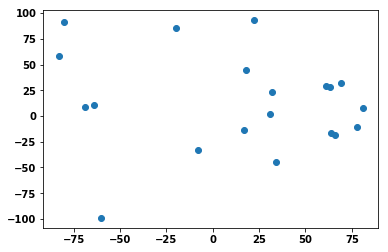

In [6]:
plt.scatter(latitudes, longitude)

给定一个初始点 𝑃, 已经 𝑘个车辆，如何从该点出发，经这 k 个车辆经过所以的点全部一次，而且所走过的路程最短?

例如：

In [1]:
from copy import deepcopy
import numpy as np
n = 4
longitudes = [np.random.randint(-100, 100) for _ in range(n)]
latitudes = [np.random.randint(-100, 100) for _ in range(n)] 
coordinates = list(zip(longitudes, latitudes)) 
len(coordinates), coordinates[0]

(4, (-25, 26))

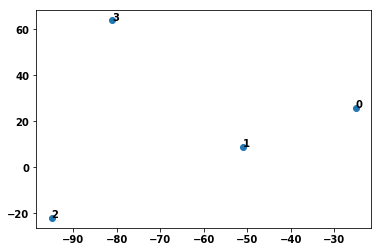

In [3]:
import random
import matplotlib.pylab as plt

fig, ax = plt.subplots()
ax.scatter(longitudes, latitudes)

for i in range(n):
    ax.annotate(i, (longitudes[i], latitudes[i]))

In [5]:
def get_distance(x: tuple, y: tuple) -> float:
    return np.sqrt((x[0]-y[0])**2 + (x[-1]-y[-1])**2)

In [6]:
length = len(coordinates)
dp = [[float('inf')] * 2**(length-1) for _ in range(length)]
# 计算所有城市两两之间的距离
all_distances = {frozenset([i, j]): get_distance(coordinates[i], coordinates[j]) for i in range(length) for j in range(i+1, length)}

In [8]:
dp

[[inf, inf, inf, inf, inf, inf, inf, inf],
 [inf, inf, inf, inf, inf, inf, inf, inf],
 [inf, inf, inf, inf, inf, inf, inf, inf],
 [inf, inf, inf, inf, inf, inf, inf, inf]]

In [23]:
all_distances 

{frozenset({0, 1}): 150.20652449211386,
 frozenset({0, 2}): 32.38826948140329,
 frozenset({0, 3}): 94.93682109698007,
 frozenset({1, 2}): 129.24782396620841,
 frozenset({1, 3}): 83.02409288875127,
 frozenset({2, 3}): 64.1404708432983}

In [9]:
for i in range(length):
    if i == 0: continue
    dp[i][0] = all_distances[frozenset([i, 0])]

In [21]:
dp

[[inf, inf, inf, inf, inf, inf, inf, inf],
 [150.20652449211386, inf, inf, inf, inf, inf, inf, inf],
 [32.38826948140329, inf, inf, inf, inf, inf, inf, inf],
 [94.93682109698007, inf, inf, inf, inf, inf, inf, inf]]

In [89]:
 a,b=tsp2(coordinates)

In [90]:
b

{(0, 1): (1, 0),
 (2, 1): (1, 0),
 (3, 1): (1, 0),
 (0, 2): (2, 0),
 (1, 2): (2, 0),
 (3, 2): (2, 0),
 (0, 3): (1, 2),
 (3, 3): (1, 2),
 (0, 4): (3, 0),
 (1, 4): (3, 0),
 (2, 4): (3, 0),
 (0, 5): (1, 4),
 (2, 5): (3, 1),
 (0, 6): (2, 4),
 (1, 6): (3, 2),
 (0, 7): (1, 6)}

In [92]:
a

[[inf,
  300.4130489842277,
  64.77653896280658,
  311.8426179397255,
  189.87364219396014,
  328.16743847784517,
  191.46556142168166,
  329.7593577055667],
 [150.20652449211386,
  inf,
  161.6360934476117,
  inf,
  177.96091398573134,
  inf,
  179.55283321345286,
  inf],
 [32.38826948140329,
  279.4543484583223,
  inf,
  inf,
  159.07729194027837,
  297.37108822416343,
  inf,
  inf],
 [94.93682109698007,
  233.2306173808651,
  96.5287403247016,
  244.66018633636298,
  inf,
  inf,
  inf,
  inf]]

In [38]:
def parse_solutions(length: int, solutions: dict):
    route = ['0']
    def helper(row: int, col: int):
        i, j = solutions[(row, col)]
        route.append(str(i))
        if j == 0:
            return
        helper(i, j)
    helper(0, 2**(length-1)-1)
    route.append('0')
    return route

def my_print(route) -> str:
    print('->'.join(route))

In [39]:
len(coordinates)

4

In [40]:
parse_solutions(4, b)

['0', '1', '3', '2', '0']

In [41]:
coordinates

[(-67, 63), (22, -58), (-35, 58), (20, 25)]

In [46]:
def tsp(coordinates):
    tsp.solution={}
    length=len(coordinates)
    dp=[[float('inf')]*(2**(length-1))for _ in range(length)]    
    all_distances = {frozenset([i, j]): get_distance(coordinates[i], coordinates[j]) for i in range(length) for j in range(i+1, length)}
    for i in range(length):
        if i==0:
            continue
        dp[i][0]=all_distances [ frozenset({i, 0})]
    for j in range(1,2**(length-1)):
        for i in range(length):
            if i!=0 and  ((j>>(i-1))&1)==1:
                continue
            for k in range (1,length):
                if k!=0 and ((j>>(k-1))&1)==0:
                    continue
                pos=j^(1<<(k-1))
                tmp_dist=all_distances [ frozenset({i, k})]+ dp[k][pos]
                if  dp[i][j]>tmp_dist:
                    dp[i][j]=tmp_dist
                    tsp.solution[(i,j)]=(k, pos)
    return dp[0][-1]

In [17]:
dp,result=tsp(coordinates)

In [29]:
np.array(dp)

array([[         inf,  62.12889827, 169.75276139, 169.76461639,
        135.35139453, 161.38996683, 239.6841616 , 239.6960166 ],
       [ 31.06444913,          inf, 138.70016726,          inf,
        130.32551769,          inf, 208.63156747,          inf],
       [ 84.8763807 ,  84.8882357 ,          inf,          inf,
        154.80778091, 180.84635321,          inf,          inf],
       [ 67.67569726,  93.71426956, 172.00846434, 172.02031934,
                 inf,          inf,          inf,          inf]])

In [19]:
result

239.69601660313208

In [15]:
tsp.solution

{(0, 1): (1, 0),
 (2, 1): (1, 0),
 (3, 1): (1, 0),
 (0, 2): (2, 0),
 (1, 2): (2, 0),
 (3, 2): (2, 0),
 (0, 3): (1, 2),
 (3, 3): (2, 1),
 (0, 4): (3, 0),
 (1, 4): (3, 0),
 (2, 4): (3, 0),
 (0, 5): (3, 1),
 (2, 5): (3, 1),
 (0, 6): (2, 4),
 (1, 6): (2, 4),
 (0, 7): (1, 6)}

In [99]:
a,b=tsp(coordinates)

In [100]:
b

{(0, 1): (1, 0),
 (2, 1): (1, 0),
 (3, 1): (1, 0),
 (0, 2): (2, 0),
 (1, 2): (2, 0),
 (3, 2): (2, 0),
 (0, 3): (1, 2),
 (3, 3): (1, 2),
 (0, 4): (3, 0),
 (1, 4): (3, 0),
 (2, 4): (3, 0),
 (0, 5): (1, 4),
 (2, 5): (3, 1),
 (0, 6): (2, 4),
 (1, 6): (3, 2),
 (0, 7): (1, 6)}

In [101]:
a

329.7593577055667

In [70]:
all_distances 

{frozenset({0, 1}): 150.20652449211386,
 frozenset({0, 2}): 32.38826948140329,
 frozenset({0, 3}): 94.93682109698007,
 frozenset({1, 2}): 129.24782396620841,
 frozenset({1, 3}): 83.02409288875127,
 frozenset({2, 3}): 64.1404708432983}

In [58]:
def get_distance(x: tuple, y: tuple) -> float:
    return np.sqrt((x[0]-y[0])**2 + (x[-1]-y[-1])**2)

In [33]:
def parse_solutions(length: int, solutions: dict) -> str:
    route = ['0']
    def helper(row: int, col: int) -> None:
        i, j = solutions[(row, col)]
        route.append(str(i))
        if j == 0: return
        helper(i, j)
    helper(0, 2**(length-1)-1)
    route.append('0')
    return route

def re_print(route) -> str:
    print('->'.join(route))

In [31]:
route = parse_solutions(len(coordinates), tsp.solution)

In [34]:
 re_print(route)

0->1->2->3->0


In [ ]:
fig, ax = plt.subplots()
ax.scatter(longitudes, latitudes)
k1, k2, k3 = coordinates[18], coordinates[13], coordinates[14]
ax.scatter(k1[0], k1[1], color='r')
ax.scatter(k2[0], k2[1], color='r')
ax.scatter(k3[0], k3[1], color='r')
for i in range(n):
    ax.annotate(i, (longitudes[i], latitudes[i]))

# 增多到20个点

In [36]:
from copy import deepcopy
import numpy as np
n = 20
longitudes = [np.random.randint(-100, 100) for _ in range(n)]
latitudes = [np.random.randint(-100, 100) for _ in range(n)] 
coordinates = list(zip(longitudes, latitudes))
len(coordinates), coordinates[0]

(20, (-89, 83))

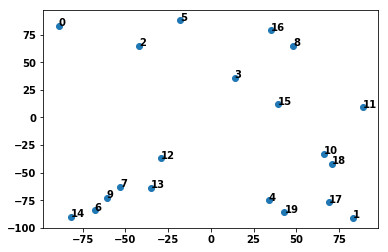

In [37]:
import random
import matplotlib.pylab as plt

fig, ax = plt.subplots()
ax.scatter(longitudes, latitudes)

for i in range(n):
    ax.annotate(i, (longitudes[i], latitudes[i]))

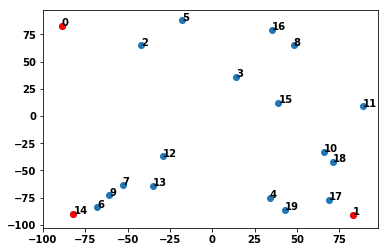

In [41]:
fig, ax = plt.subplots()
ax.scatter(longitudes, latitudes)
k1, k2, k3 = coordinates[0], coordinates[1], coordinates[14]
ax.scatter(k1[0], k1[1], color='r')
ax.scatter(k2[0], k2[1], color='r')
ax.scatter(k3[0], k3[1], color='r')
for i in range(n):
    ax.annotate(i, (longitudes[i], latitudes[i]))

In [47]:
def mul_start_tsp(coordinates, k1: int, k2: int, k3: int):
    length = len(coordinates)
    all_distances = {frozenset([i, j]): get_distance(coordinates[i], coordinates[j]) for i in range(length) for j in range(i+1, length)}
    c = [[k1], [k2], [k3]]
    # clustering
    for i in range(length):
        if i in [k1, k2, k3]: 
            continue
        dist = np.array([all_distances[frozenset([i, k1])], all_distances[frozenset([i, k2])], all_distances[frozenset([i, k3])]])
        c[dist.argmin()].append(i)
    solutions = []
    for cluster in c:
        distance = tsp([coordinates[i] for i in cluster])
        solutions.append((distance, tsp.solution))
    return c, solutions

In [131]:
k1

(44, -37)

In [48]:
c, solutions = mul_start_tsp(coordinates, 0, 1, 14)

In [49]:
c


[[0, 2, 3, 5, 8, 16], [1, 4, 10, 11, 15, 17, 18, 19], [14, 6, 7, 9, 12, 13]]

In [51]:
solutions[0]

(302.11971616786764,
 {(0, 1): (1, 0),
  (2, 1): (1, 0),
  (3, 1): (1, 0),
  (4, 1): (1, 0),
  (5, 1): (1, 0),
  (0, 2): (2, 0),
  (1, 2): (2, 0),
  (3, 2): (2, 0),
  (4, 2): (2, 0),
  (5, 2): (2, 0),
  (0, 3): (1, 2),
  (3, 3): (2, 1),
  (4, 3): (2, 1),
  (5, 3): (2, 1),
  (0, 4): (3, 0),
  (1, 4): (3, 0),
  (2, 4): (3, 0),
  (4, 4): (3, 0),
  (5, 4): (3, 0),
  (0, 5): (1, 4),
  (2, 5): (3, 1),
  (4, 5): (3, 1),
  (5, 5): (3, 1),
  (0, 6): (3, 2),
  (1, 6): (2, 4),
  (4, 6): (2, 4),
  (5, 6): (2, 4),
  (0, 7): (1, 6),
  (4, 7): (2, 5),
  (5, 7): (2, 5),
  (0, 8): (4, 0),
  (1, 8): (4, 0),
  (2, 8): (4, 0),
  (3, 8): (4, 0),
  (5, 8): (4, 0),
  (0, 9): (1, 8),
  (2, 9): (4, 1),
  (3, 9): (4, 1),
  (5, 9): (4, 1),
  (0, 10): (2, 8),
  (1, 10): (2, 8),
  (3, 10): (4, 2),
  (5, 10): (4, 2),
  (0, 11): (1, 10),
  (3, 11): (4, 3),
  (5, 11): (4, 3),
  (0, 12): (3, 8),
  (1, 12): (4, 4),
  (2, 12): (4, 4),
  (5, 12): (4, 4),
  (0, 13): (3, 9),
  (2, 13): (4, 5),
  (5, 13): (4, 5),
  (0, 14):

In [54]:
def parse_mul_solutions(c, solutions):
   
    routes = []
    for i, (_, s) in enumerate(solutions):
        parse_mul_solutions.idx_map = {str(j): str(val) for j, val in enumerate(c[i])} 
        tmp = parse_solutions(len(c[i]), s)
        routes.append([parse_mul_solutions.idx_map [k] for k in tmp])
    return routes 

In [55]:
routes = parse_mul_solutions(c, solutions)

In [56]:
routes 

[['0', '2', '3', '8', '16', '5', '0'],
 ['1', '17', '18', '10', '11', '15', '4', '19', '1'],
 ['14', '9', '7', '12', '13', '6', '14']]

In [137]:
for r in routes:
    pretty_print(r)

18->6->5->10->2->17->18
13->0->9->4->3->13
14->1->16->19->12->11->8->15->7->14


In [144]:
parse_mul_solutions.idx_map

{'0': '14',
 '1': '1',
 '2': '7',
 '3': '8',
 '4': '11',
 '5': '12',
 '6': '15',
 '7': '16',
 '8': '19'}

In [147]:
c[2]

[14, 1, 7, 8, 11, 12, 15, 16, 19]